## Лабораторная работа №6
#### По теме: " Нахождение минимума функции нескольки переменных"
***
                                                                        Лабораторную работу выполнил:
                                                                        студент Пугавко М. М. 430 гр
                                                                        
***
#### Метод Ньютона
Минимум функции нескольки переменных будем находить с помощью метода Ньютона. Это метод второго порядка.

#####  Теория.
Пусть задана функци $f:R^n->R^n$
Тогда минимум данной функции можно находить следующим образом
Для начала найдем Гессиан функции:

$$G(f) = \begin{pmatrix}
\frac{\partial^2f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2f}{\partial x_1 \partial x_n} \\
\frac{\partial^2f}{\partial x_2 \partial x_1} & \frac{\partial^2f}{\partial x_2^2} & \cdots & \frac{\partial^2f}{\partial x_2 \partial x_n} \\         
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2f}{\partial x_n \partial x_1} & \frac{\partial^2f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2f}{\partial x_n^2}
\end{pmatrix}$$

> Пусть мы знаем начальную точку(ее можно задавать самому, но не всегда выбор может быть удачным, так как при >
>некоторых значениях detG будет равен нулю, а для нашего метода мы ищем обратную матрицу Гессе)

Тогда за нулевое приближение берем точку $ X = X^0 $, $X \in R^n$
Так же нам необходимо будет записать grad, но это столбец, в которой все значения это первые производные

Таким образом следующие приближение от предыдущего запишется в следующем виде

$$ X^{k + 1} = X^{k} - G^{-1}(f)grad(f)$$

Критерий остановки проверяем следующим обр.:

$$|grad(f(X^{k+1}))| < \varepsilon$$

Таким образом мы можем найти минимум функции нескольки переменных.
***
В задании требуется так же построить линии уровня, ну это мы легко сделаем с помощью pylab.contour

Построить график двух переменных можно с помощью Axes3D

Производные будем брать численно, точность используем такуюже, как и для нахождения минимума, а эта точность в нашем случае равна $\varepsilon = 0.001$


##### Код для моей функции, которая задана в задании.

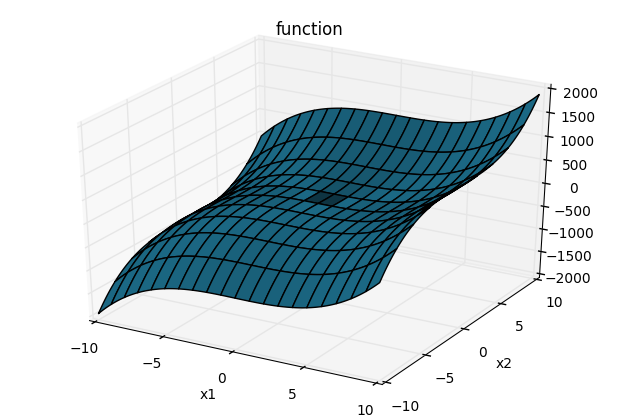

Минимум функции в точке: O( 0.816496580739 0.999999997897 )
Минимум найден за  5  шагов


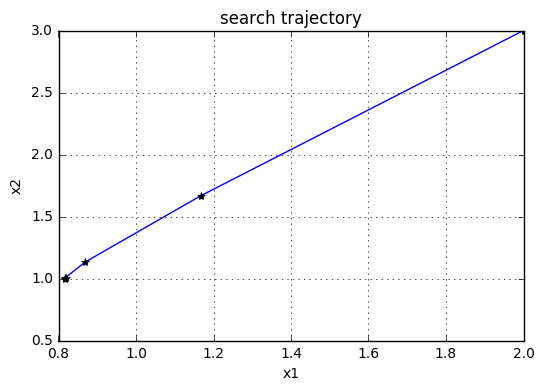

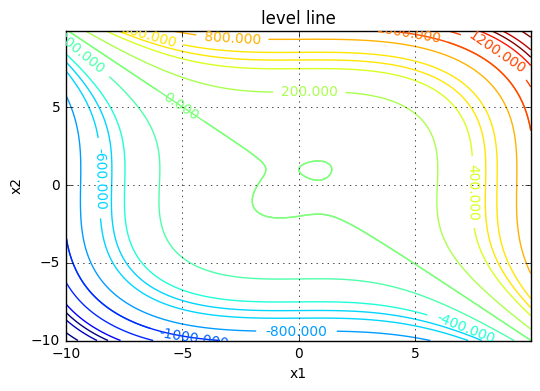

Показатель овражности:  1.2247448691
Наличие отр. собст. значений при итерациях:  0


In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import numpy as np
import pylab
eps = 0.001
def myfunc(x1, x2):
    return x1 ** 3 + x2 ** 3 - 2 * x1 - 3 * x2 + 2


stpoint = np.array([2, 3])

# Создадим диффиринцирующий класс, учитывая, что вторая производная по разным переменным даст 0
class diff_fx:
    def __init__(self, var, h):
        self.h = h
        self.var = var

    def diff(self, x1, x2):
        if self.var == '1':
            return (myfunc(x1 + self.h, x2) - myfunc(x1 - self.h, x2))/(2*self.h)
        if self.var == '2':
            return (myfunc(x1, x2 + self.h)-myfunc(x1, x2 - self.h))/(2*self.h)
        if self.var == '22':
            return (myfunc(x1, x2 + self.h) - 2*myfunc(x1, x2) + myfunc(x1, x2 - self.h))/(self.h**2)
        if self.var == '11':
            return (myfunc(x1 + self.h, x2) - 2 * myfunc(x1, x2) + myfunc(x1 - self.h, x2))/(self.h**2)
def Ges(s):
    Gesse = np.zeros((2, 2))
    for i in range(2):
        for j in range(2):
            q = 1
            h = 1
            df1, df2 = 1, 2
            if j == i:
                x1 = s[0]
                x2 = s[1]
                while q >= eps:
                    df2 = df1
                    d = diff_fx(str(j + 1) + str(i + 1), h)
                    df1 = d.diff(x1, x2)
                    if df1 == 0:
                        break
                    q = abs((df1 - df2) / df1)
                    h = h / 2
                Gesse[i, j] = df1
    Gesse = np.linalg.inv(Gesse)
    return Gesse
def grad(s):
    gr = np.zeros((1, 2))
    for i in range(2):
        df1 = 1
        df2 = 2
        h = 1
        q = 1
        while q >= eps:
            d = diff_fx(str(i+1), h)
            df1 = d.diff(s[0], s[1])
            if df1 == 0:
                break
            q = abs((df1 - df2)/df1)
            df2 = df1
            h = h/2
        gr[0, i]  = df1
    return gr

#Посмтроим график функции

def makeData ():
    x1 = np.arange (-10, 10, 0.1)
    x2 = np.arange (-10, 10, 0.1)
    xgrid, ygrid = np.meshgrid(x1, x2)

    zgrid = myfunc(xgrid, ygrid)
    return xgrid, ygrid, zgrid

x1, x2, z = makeData()

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x1, x2, z,rstride = 20, antialiased = True, color = '#1b6884' )
pylab.xlabel('x1')
pylab.ylabel('x2')
pylab.title('function')
pylab.show()
# минимум функции
#xk = x(k-1) - G^-1grad(f)
q = 1
p = 0
find = []
calcul = 0
find.append(stpoint)
while q >= eps:
    if q != 1:
        stpoint = stpoint[0]
    stpoint2 = stpoint
    gs = Ges(stpoint)
    ovr =  np.linalg.eig(np.linalg.inv(gs))
    for i in range(2):
        if ovr[0][i] < 0:
            calcul += 1
    gr = grad(stpoint)
    gr = gr.transpose()
    do = np.dot(gs, gr)
    do = do.transpose()
    stpoint = stpoint - do
    stpoint1 = stpoint
    #q = np.linalg.norm(gr)
    q = np.linalg.norm(stpoint1 - stpoint2)/np.linalg.norm(stpoint1)
    p += 1
    find.append(stpoint[0])
print('Минимум функции в точке: O(', stpoint[0][0], stpoint[0][1], ')')
print('Минимум найден за ', p, ' шагов')
minpoint = [stpoint[0][0], stpoint[0][1]]

x, y = [], []
for i in range(6):
    x.append(find[i][0])
    y.append(find[i][1])

plt.plot(x, y, color = 'blue')
plt.plot(x, y, '*', color = 'black')
plt.xlabel('x1')
plt.ylabel(('x2'))
plt.title('search trajectory')
plt.grid(True)
plt.show()
def makeData():
    x = np.arange(-10, 10, .05)
    y = np.arange(-10, 10, .05)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = myfunc(xgrid, ygrid)
    return xgrid, ygrid, zgrid
x, y, z = makeData()
x, y, z = makeData()
cs = pylab.contour(x, y, z, 20)
pylab.xlabel('x1')
pylab.ylabel('x2')
pylab.title('level line')
pylab.clabel(cs)
pylab.contour(x, y, z)
pylab.grid(True)
pylab.show()

Ges = np.linalg.inv(Ges(stpoint[0]))

ovr =  np.linalg.eig(Ges)
if ovr[0][1] > ovr[0][0]:
        I = ovr[0][1]/ovr[0][0]
else:
    I = ovr[0][0]/ovr[0][1]
print('Показатель овражности: ', I)
print('Наличие отр. собст. значений при итерациях: ', calcul)

#####  Черный ящик для 10-ти переменных включительно
***

### Код для черного ящика
***

In [5]:
### from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import numpy as np
import ast
import pylab
eps = .001                   #Точность для всего, как для производных, так и для
print("Введи функцию, или хочешь использовать стандартную? Если да, то введи 'yes' или 'Yes', если нет, то введи 'no' или 'No'")
Booll = True
while Booll:
    Qest = str(input())
    if (Qest == 'Yes' or Qest == 'yes'):
        print('Вводи свою функцию в следующем виде: \n x1**2 + a*x2**2 +...')
        function = str(input())
        '''print('Введи начальную точку функции')'''
        Booll = False
    elif (Qest == 'secret'):
        function =  'x1**2 + x2** + x3**2 + x4**2 + x5**2 + x6**2 + x7**2 + x8**2 + x9**2 + x10 ** 2 - 2*x1**3 + x2**3 + x3**4 + x7**3'
        print('Ты выбрал секретную функцию \n :', function)
        Booll = False

    elif (Qest == 'No' or Qest == 'no'):
        function = 'x1**3 + x2**3 - 2*x1 - 3*x2 + 2'
        Booll = False
#с помощью модуля ast переводим в функцию, для работы с ней
information = []
step = 0
for i in range(len(function) - 1):
    if function[i] == 'x':
        Booll = 0
        step += 1
        number = function[i + 1]
        if step == 1:
            information.append(int(number))
        else:
            for k in range(len(information)):
                if str(information[k]) == number:
                    Booll = 1

            if number == '1' and function[i + 2] == '0':
                information.append(10)
            if Booll == 0:
                information.append(int(number))
print(len(information))
information.sort()
print(information)
print('Твоя функция имеет ', len(information), ' размерность')
print('Твои переменные: ')

var = []
for i in range(len(information)):
    var.append('x' + str(i+1))
print(var)
print(' Введи начальную точку ')
s = np.zeros(10)
for i in range(len (information)):
    print('x'  + str(i + 1))
    s[i] = float(input(' '))
stpoint = s
def func(strf):
   root = ast.parse(strf)
   names = sorted({node.id for node in ast.walk(root) if isinstance(node, ast.Name)})
   kwargs = {k:0 for k in names}
   _d = {'kwargs': kwargs, '_s':strf}
   exec('''def newf(**kwargs):
               for k in kwargs:
                   locals()[k]=kwargs[k]
               return eval(_s)''',_d)
   return _d['newf']
g=func(function)
n = 2
def work_func(s):
    return g(x1 = s[0], x2 = s[1], x3 = s[2], x4 = s[3], x5 = s[4], x6 = s[5], x7 = s[6], x8 = s[7], x9 = s[8], x10 = s[9])
print('value in start point: \n ', work_func(s))
# Далее идет кусок кода по поиска минимума функции
# Вычисляем производные, поэтому создадим функцию, которая берет производные.
# Можно для этого создать либо функцию, которая берет вторую производну сразу,
# Либо функцию, которая методом рекурсии берет вторую производную
# Для упрощения данного кода мы будем принимать во внимание, что пользователь вводит функцию в следующем виде:
#x1**2 + x2**2..., т.е. без каких либо скобок, тогда вторые производные по двум переменным будут давать всегда нуль
#Ясно, что при заполнении Матрицы Гессе у нас эти производные дадут нуль, а следовательно единственными возоможными
#Не нулевыми элементами будут числа стоящие на главной диагонали, что сильно упросит нам задачу

def diff(s, var, h):
    cac = np.zeros(10)
    for i in range(len(information)):
        if var == str(i+1) or var == (str(i + 1) + str(i +1)):
            cac[i] = s[i]
            c = work_func(cac)
            cac[i] = cac[i] + h
            a = work_func(cac)
            cac[i] = cac[i] - 2*h
            b = work_func(cac)
            if var == str(i+1):
                return (a - b)/(2*h)
            elif var == (str(i + 1) + str(i + 1)):
                return (a - 2*c + b)/h**2

# Дело за малым, все готово для расчета минимума функции, расчитаем матрицу Гессе, а также градиенты и, вообще говоря, сразу будем считать все, что нужно.Gesse = np.zeros((len(information), len(information)))
def Ges(s):
    gesse = np.zeros((len(information), len(information)))
    for i in range(len(information)):
        var = str(i + 1) + str(i + 1)
        q = 1
        h = 1
        df2 = np.exp(19)
        while q >= eps:
            df1 = diff(s, var, h)
            if df1 == 0:
                break
            h = h/2
            q = abs((df1 - df2)/df1)
            df2 = df1
        gesse[i, i] = df1
    gesse = np.linalg.inv(gesse)
    return gesse
def Grad(s):
    grad = np.zeros(len(information))
    for i in range(len(information)):
        var = str(i + 1)
        q = 1
        h = 1
        df2 = np.exp(19)
        while q >= eps:
            df1 = diff(s, var, h)
            if df1 == 0:
                break
            h = h/2
            q = abs((df1 - df2)/df1)
            df2 = df1
        grad[i] = df1
    return grad
'''
for i in range(len(information)):
    for k in range(2):
        q = 1
        h = 1
        df2 = np.exp(19)
        if k == 0:
            var = str(i)
        if k == 1:
            var = str(i + 1) + str(i + 1)
            while q >= eps:
                df1 = diff(stpoint, var, h)
                if df1 == 0:
                    break
                h = h/2
                q = abs(df1 - df2)/df1
                df2 = df1
            grad[i] = df1
            if k == 0:
                grad[i] = df1
            else:
                gesse[i, i] = df1
print('gesse', Ges(stpoint))
print('grad', grad)'''
'''print('gesse', Ges(stpoint))
print('grad', Grad(stpoint))'''
# Подсчитаем минимум функции, тестовой станет функция, которую мы просчитали в первом задании
q = 1
p = 0
endpoint = np.zeros(len(information))
calcul = 0
while q >= eps:


    stpoint1 = stpoint
    gs = Ges(stpoint)
    ovr = np.linalg.eig(np.linalg.inv(gs))
    for i in range(len(information)):
        if ovr[0][i] < 0:
            calcul += 1
            print("плохая сходимость")
    gr = Grad(stpoint)
    gr = gr.transpose()
    do = np.dot(gs, gr)
    do = do.transpose()
    d = np.zeros(10)
    for i in range(len(information)):
        d[i] = do[i]
    stpoint = stpoint - d

    
    #q = np.linalg.norm(gr)
    q = np.linalg.norm(stpoint1-stpoint)/np.linalg.norm(stpoint1)
    stpoint1 = stpoint
    p += 1
print('Количество итераций проведенных для расчета минимума:', p)
print('Точка минимума: ')
if len((information)) != 10:
    print('O(', stpoint[:-(10 - len(information))], ')')
else: print('O(',stpoint, ')')
ovr = np.linalg.eig(Ges(stpoint))
print ('Показатель овражности: ', max(ovr[0])/min(ovr[0]))
print('Наличие отр. собст. значений при итерациях: ', calcul)

Введи функцию, или хочешь использовать стандартную? Если да, то введи 'yes' или 'Yes', если нет, то введи 'no' или 'No'
no
2
[1, 2]
Твоя функция имеет  2  размерность
Твои переменные: 
['x1', 'x2']
 Введи начальную точку 
x1
 2
x2
 3
value in start point: 
  24.0
Количество итераций проведенных для расчета минимума: 5
Точка минимума: 
O( [ 0.81649658  1.        ] )
Показатель овражности:  1.2247448691
Наличие отр. собст. значений при итерациях:  0


> Для написания ящика использовался модуль "ast"